Mounting your GoogleDrive

(GoogleDrive authorization will be asked)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

program_location = '/content/drive/MyDrive/Colab Notebooks/viirs_versatile'

Mounted at /content/drive


In [3]:
ISO_code = 'CHE'

NOTE: In the below Set-up section, adjust relevant file paths so that they will fit your directory structure.

---
# **Set-up**

In [4]:
RW_engine = 'pyogrio'
rasterSwitch = 'NO'

Importing module(s)

In [5]:
!pip install geopandas rioxarray richdem geemap rasterio import_ipynb pyshp pycrs pyogrio xarray-spatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.1 MB/s eta 0:00:00
  Created wheel for richdem: filename=richdem-0.3.4-cp310-cp310-linux_x86_64.whl size=7844534 sha256=ca4d097b376f0689a7fc06aa94e6fe3b2a84d36fc9ed86c1f2122fcc505dbce4
  Stored in directory: /root/.cache/pip/wheels/01/61/27/5c305116b5cffecf04ed75c40f640e2baf231dae20954e31e0
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32687 sha25

In [6]:
# Colab default packages
import io
import os
import types
import sys
import glob
import importlib
import multiprocessing as mp
from multiprocessing import Pool
import numpy as np
import pandas as pd
import json
import datetime
from sklearn.neighbors import KDTree
from shapely.geometry import mapping
from shapely import geometry
from shapely.validation import make_valid
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics

# Temporarily installed packages
import geopandas as gpd
import xarray as xr
from xrspatial import zonal_stats
import rioxarray
import rasterio
from rasterio import features
import richdem as rd
import geemap
import pyogrio
import pycrs
import import_ipynb
from matplotlib.ticker import ScalarFormatter

# Import external files
os.chdir(program_location)
!pwd

sys.path.append(program_location)

import tools
importlib.reload(tools)


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most r

/content/drive/MyDrive/Colab Notebooks/viirs_versatile


<module 'tools' from '/content/drive/MyDrive/Colab Notebooks/viirs_versatile/tools.py'>

Generating an 'output' foldirectory in the target city directory

Adjust file path as you want.

In [7]:
data_loc = os.path.join(os.getcwd(), 'data')
output_loc = os.path.join(data_loc, 'output')
fig_loc = os.path.join(os.getcwd(), 'figs')


print(data_loc)
print(fig_loc)
print(output_loc)

/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/figs
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output


In [8]:
if not os.path.exists(output_loc):
    os.mkdir(output_loc)

---
# **Construct an Xarray dataset**

Before starting this block, be sure that all VIIRS raster images are stored in viirs_versatile/data/ouput/*ISO*/moonthly/

Also be sure that all VIIRS mask images are stored in viirs_versatile/data/ouput/*ISO*/mask/

Convert all pre-downloaded VIIRS geotiff files to a single X-array dataset. This is a memory-heavy process. Need at least +50 GB RAM.

In [9]:
# Read the downloaded VIIRS rasters form local disk (check the data location specified by 'data_loc')
list_rasters = sorted( glob.glob(os.path.join(data_loc, 'output', ISO_code, 'monthly', '*.tif')) )

for x in list_rasters:
  print(x)

/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201401.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201402.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201403.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201404.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201405.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201406.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201407.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201408.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201409.tif
/content/drive/MyDrive/Colab Notebooks/viirs_versatile/data/output/CHE/monthly/CHE_viirs_201410.tif


In [10]:
# Construct time coordinate
list_time = []

for y in range(2014, 2024):

    for m in range(1, 13):
      time_stamp = str(y) + '-' + str(m).zfill(2) + '-' + '01'
      time_stamp = datetime.datetime.strptime(time_stamp, '%Y-%m-%d')

      list_time.append(time_stamp)


# Convert the time list to a time array
time = np.array(list_time)
time_var = xr.Variable('time', time)



# Construct VIIRS data array
da = xr.concat([rioxarray.open_rasterio(i) for i in list_rasters], dim = time_var)


# Convert the DA to a xarray dataset
ds = da.to_dataset("band")
ds = ds.rename({1: 'avg_rad'})

ds

<xarray.Dataset>
Dimensions:      (time: 120, y: 476, x: 1089)
Coordinates:
  * x            (x) float64 5.956 5.96 5.965 5.969 ... 10.48 10.48 10.49 10.49
  * y            (y) float64 47.81 47.8 47.8 47.79 ... 45.84 45.84 45.83 45.83
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2023-12-01
Data variables:
    avg_rad      (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      avg_rad

In [11]:
# Compute basic statistics
ds['sum'] = ds.avg_rad.sum(["x", "y"])
ds['sum_LOG'] = np.log(ds.avg_rad.sum(["x", "y"]))
ds['std'] = ds.avg_rad.std(dim = 'time')

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


---
# **Anomaly NTL piexels reduction (background noise and max anomalies)**

**For the VIIRS-like data**, you must skip this section as it is already background noise reduced.

In [13]:
# You can select any year (V21) for the mask.
mask_file_name = 'CHE_viirs_maskV21_2021.tif'

In [14]:
# Import annual mask created by Earth Observation Group, Payne Institute for Public Policy, Colorado School of Mines
src_ras = os.path.join(data_loc, 'output',ISO_code, 'mask', mask_file_name)
mask_v21 = rioxarray.open_rasterio(src_ras)


# Here band is 'average_masked' that is extracted in the downloading process
ds_mask = mask_v21.to_dataset("band")
ds_mask = ds_mask.rename({1: 'mask'})

ds_mask['mask_bool'] = ds_mask['mask'] > 0


# Applying background noise and max anomaly filters to 'avg_rad' variable
# Here the max anomaly filter is set to avg_rad < 300

ds['avg_rad_BNR'] = ds['avg_rad'].where(ds_mask['mask_bool'] & (ds['avg_rad'] < 300) & (ds['avg_rad'] > 0))

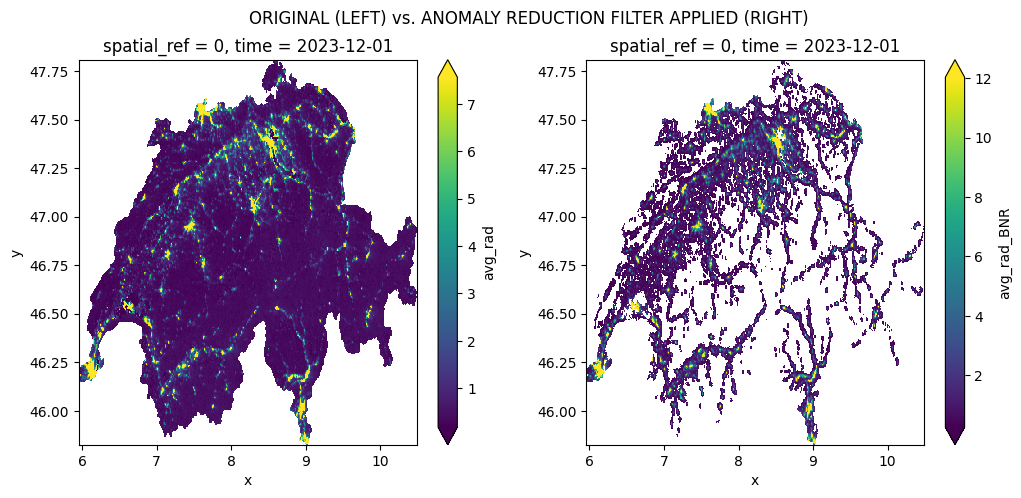

In [17]:
# Spatially visualize the filter effect (Right Panel)
sample_time = '2023-12-01'


fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1 = ds['avg_rad'].sel(time = sample_time).plot(robust = True)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = ds['avg_rad_BNR'].sel(time = sample_time).plot(robust = True)


# Add fig title
fig.suptitle("ORIGINAL (LEFT) vs. ANOMALY REDUCTION FILTER APPLIED (RIGHT)")

plt.show()

# Export fig (optional)
src_fig_temp = os.path.join(data_loc, 'fig', 'spatial_visualization_of_anomalyReduction.png')
fig.savefig(src_fig_temp, bbox_inches="tight", dpi=500)

In [ ]:
# Export the raster that the noise reduction filter applied if needed (OPTIONAL)

# Want export? 'yes' or 'no'
export_option = 'no'

if export_option == 'yes':

    for y in range(2014, 2024):

        for m in range(1, 13):
          time_temp = str(y) + '-' + str(m).zfill(2) + '-' + '01'
          print(time_temp)

          # Construct a temporary file path
          out_ras_name = os.path.join(data_loc, 'output', 'AnomalyReduced_viirs_' + str(y) + str(m).zfill(2) + '01' + '.tif')


          # Export an x array
          ds['avg_rad_BNR'].sel(time = time_temp).rio.to_raster(out_ras_name)

---
#**Zonal stats**

### Zone raster prep

Import an admin border shapefile of interest and rasterize it using a unique ID. The target shapefile must hava one unique ID column.

In [26]:
# Import adm1 vector
src_zone = os.path.join(data_loc, 'adm2', 'wb_adm2.shp')
gdf_zone = tools.vec_import(RW_engine, src_zone)

# Transform the CRS to that of DS
gdf_zone.to_crs(ds.rio.crs, inplace = True)
gdf_zone.crs

# Check inside
gdf_zone.head(5)

Vector import complete.
GDF size:37279
EPSG:4326


,OBJECTID,ISO_A2,WB_ADM1_CO,WB_ADM0_CO,WB_ADM0_NA,WB_ADM1_NA,WB_ADM2_CO,WB_ADM2_NA,Shape_Leng,ISO3,Shape_Le_1,Shape_Area,geometry
0,1,AF,272,1,Afghanistan,Badakhshan,3445,Baharak,426829.104142,AFG,3.464540,0.304174,"POLYGON ((71.31934 37.24848, 71.31261 37.24059..."
1,2,AF,272,1,Afghanistan,Badakhshan,3446,Darwaz,360455.172484,AFG,2.934185,0.299847,"POLYGON ((70.99956 38.47933, 71.00709 38.47256..."
2,3,AF,272,1,Afghanistan,Badakhshan,3447,Fayzabad,298846.796442,AFG,2.395813,0.298038,"POLYGON ((70.76822 37.28326, 70.77164 37.28042..."
3,4,AF,272,1,Afghanistan,Badakhshan,3448,Ishkashim,316148.305669,AFG,2.509734,0.158161,"POLYGON ((71.46068 37.18361, 71.44989 37.18064..."
4,5,AF,272,1,Afghanistan,Badakhshan,3449,Jurm,359146.510708,AFG,2.846146,0.353425,"POLYGON ((71.18169 36.49196, 71.17219 36.48955..."


In [27]:
# Select the target country, area

query_text = 'ISO3 == ' + '"' + ISO_code + '"'
gdf_zone = gdf_zone.query(query_text)

gdf_zone.head(5)

,OBJECTID,ISO_A2,WB_ADM1_CO,WB_ADM0_CO,WB_ADM0_NA,WB_ADM1_NA,WB_ADM2_CO,WB_ADM2_NA,Shape_Leng,ISO3,Shape_Le_1,Shape_Area,geometry
29581,29582,CH,2807,237,Switzerland,Aargau,26285,Administrative unit not available,396994.451299,CHE,3.019348,0.173011,"POLYGON ((8.43553 47.57328, 8.41517 47.55146, ..."
29582,29583,CH,2808,237,Switzerland,Appenzell Ausser-rhoden,26286,Administrative unit not available,178923.221747,CHE,1.392458,0.029735,"POLYGON ((9.59626 47.42990, 9.57420 47.43447, ..."
29583,29584,CH,2809,237,Switzerland,Appenzell Inner-rhoden,26287,Administrative unit not available,113195.513199,CHE,0.865772,0.021468,"MULTIPOLYGON (((9.38916 47.24195, 9.36765 47.2..."
29584,29585,CH,2810,237,Switzerland,Basel-landschaft,26288,Administrative unit not available,189905.679585,CHE,1.424283,0.051539,"POLYGON ((7.63847 47.56113, 7.63724 47.55902, ..."
29585,29586,CH,2811,237,Switzerland,Basel-stadt,26289,Administrative unit not available,52629.564516,CHE,0.394180,0.004945,"POLYGON ((7.63847 47.56113, 7.60588 47.56108, ..."


In [42]:
# Type the appropriate unique zone ID
zone_name = 'WB_ADM2_NA'
unique_zone_ID = 'WB_ADM2_CO'

In [29]:
# Specify a unique code for the further processes and check it is really unique

print('No. of admin = {}'.format(len(gdf_zone)))
print('No. of unique codes = {}'.format(len(gdf_zone[unique_zone_ID].unique())))

l_ucode_check = sorted(gdf_zone[unique_zone_ID].unique())

print(l_ucode_check)

No. of admin = 26
No. of unique codes = 26
[26285, 26286, 26287, 26288, 26289, 26290, 26291, 26292, 26293, 26294, 26295, 26296, 26297, 26298, 26299, 26300, 26301, 26302, 26303, 26304, 26305, 26306, 26307, 26308, 26309, 26310]


In [30]:
# Convert to a province geometry list
geom = gdf_zone[['geometry', unique_zone_ID]].values.tolist()

In [33]:
# Rasterize the province geometry list
# You can select any template variable from DS, which must be 2 dimensional (x, y) without the time dimension.
# Here, we use the 'std' variable, which is a 2 dimensional variable.

r_temp = features.rasterize(geom, out_shape = ds['std'].shape, transform = ds.rio.transform())

xr_temp = ds['std'].copy(deep = True)
xr_temp.data = r_temp

ds_temp = xr_temp.to_dataset()
ds_temp = ds_temp.rename({'std': 'originalZone_id'})

ds_temp

<xarray.Dataset>
Dimensions:          (x: 1089, y: 476)
Coordinates:
  * x                (x) float64 5.956 5.96 5.965 5.969 ... 10.48 10.49 10.49
  * y                (y) float64 47.81 47.8 47.8 47.79 ... 45.84 45.83 45.83
    spatial_ref      int64 0
Data variables:
    originalZone_id  (y, x) uint16 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

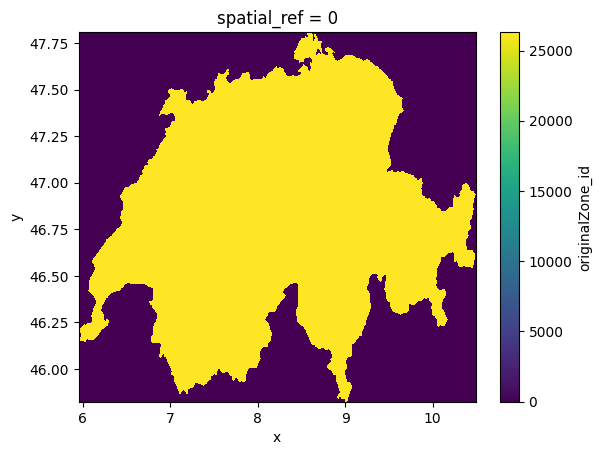

In [34]:
# Visualize the province raster to eye check
ds_temp['originalZone_id'].plot(robust = True)

### Monthly-provincial level zonal statistics

In [46]:
l_tar_col = [zone_name, unique_zone_ID]

# Montly
l_year = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
l_month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


df_out = gdf_zone[l_tar_col].copy()


for y in l_year:

  for m in l_month:

      time_tar = y + '-' + m + '-01'
      time_stamp = y + '-' + m

      print(time_tar)

      # Summary Stats
      df_Zstats_temp = zonal_stats(ds_temp['originalZone_id'], ds['avg_rad_BNR'].sel(time = time_tar))

      df_Zstats_temp = df_Zstats_temp.rename(columns = {'sum': time_stamp + '_sum', 'mean': time_stamp + '_mean', 'max': time_stamp + '_max', 'min': time_stamp + '_min', 'std': time_stamp + '_std', 'var': time_stamp + '_var'})

      df_out = df_out.merge(df_Zstats_temp.drop(columns = ['count']), left_on = unique_zone_ID, right_on = 'zone', how = 'inner')
      df_out.drop(columns = ['zone'], inplace = True)


2014-01-01
2014-02-01
2014-03-01
2014-04-01
2014-05-01
2014-06-01
2014-07-01
2014-08-01
2014-09-01
2014-10-01
2014-11-01
2014-12-01
2015-01-01
2015-02-01
2015-03-01
2015-04-01
2015-05-01
2015-06-01
2015-07-01
2015-08-01
2015-09-01
2015-10-01
2015-11-01
2015-12-01
2016-01-01
2016-02-01
2016-03-01
2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-08-01
2016-09-01
2016-10-01
2016-11-01
2016-12-01
2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01
2017-11-01
2017-12-01
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01
2018-12-01
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01
2019-12-01
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01
2021-06-01
2021-07-01

In [47]:
df_out.head(5)

,WB_ADM2_NA,WB_ADM2_CO,2014-01_mean,2014-01_max,2014-01_min,2014-01_sum,2014-01_std,2014-01_var,2014-02_mean,2014-02_max,...,2023-11_min,2023-11_sum,2023-11_std,2023-11_var,2023-12_mean,2023-12_max,2023-12_min,2023-12_sum,2023-12_std,2023-12_var
0,Administrative unit not available,26285,2.732610,39.712990,0.184920,23727.255179,3.912301,15.306100,2.550850,65.086647,...,0.26,17273.609986,2.624486,6.887928,1.721338,19.250000,0.08,14946.379995,1.944618,3.781539
1,Administrative unit not available,26286,1.336350,19.676361,0.213950,1218.750762,1.905353,3.630372,1.152857,17.677824,...,0.31,925.880001,1.252976,1.569950,1.106044,18.400000,0.21,1006.499998,1.718902,2.954626
2,Administrative unit not available,26287,1.102993,12.176091,0.254549,373.914717,1.620650,2.626506,1.067012,11.429730,...,0.32,254.929999,0.734675,0.539748,0.841746,7.830000,0.22,284.510000,1.023821,1.048209
3,Administrative unit not available,26288,3.254881,44.194347,0.229755,8570.102181,5.182925,26.862715,3.268013,52.475052,...,0.28,7709.100001,5.062742,25.631353,3.036559,42.709999,0.22,7995.259989,5.024933,25.249950
4,Administrative unit not available,26289,18.605723,57.486385,2.210735,5302.631019,13.139172,172.637845,17.304329,50.431175,...,2.13,3664.429992,10.607223,112.513174,15.657790,45.509998,1.98,4462.470022,10.402919,108.220729
5,Administrative unit not available,26290,1.770524,62.657948,0.085441,34776.637457,3.215032,10.336434,1.699608,49.980202,...,0.13,25010.729978,2.532644,6.414285,1.226034,44.389999,0.04,24008.199998,2.359231,5.565970
6,Administrative unit not available,26291,1.727176,45.309650,0.131180,13423.608461,3.243009,10.517107,1.722497,36.700943,...,0.21,9288.689991,1.908944,3.644068,1.073627,22.400000,0.02,8232.569990,1.684954,2.839071
7,Administrative unit not available,26292,8.864556,82.369209,0.631634,15105.204197,10.550966,111.322892,7.481947,63.362606,...,0.52,14034.750004,11.663170,136.029530,8.777903,84.610001,0.46,14483.540022,12.462918,155.324337
8,Administrative unit not available,26293,1.670085,21.948471,0.171261,2575.270895,2.420943,5.860965,1.626164,18.473560,...,0.03,1562.469998,1.251365,1.565914,1.126265,15.860000,0.19,1736.699995,1.528468,2.336213
9,Administrative unit not available,26294,1.565897,54.159096,0.037451,17066.709081,3.335120,11.123028,1.210638,35.131840,...,0.12,10069.539987,1.174926,1.380450,1.201824,38.740002,0.12,13096.280002,2.039271,4.158626


In [48]:
# Export the zonal-stats table
fil_name = ISO_code + '_monthly_summary_stats_v1.csv'

src_out = os.path.join(data_loc, fil_name)
df_out.to_csv(src_out, index = False)